# CS474 HW 1, Question 2
## by James Taylor

### Part A:

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

housingdata = pd.read_csv('housingdata.csv')
print(housingdata.head())

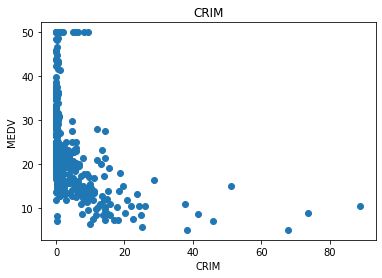

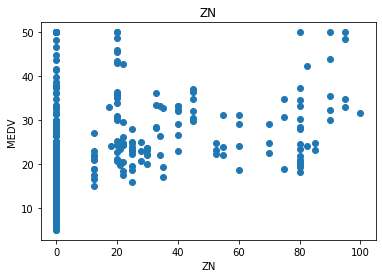

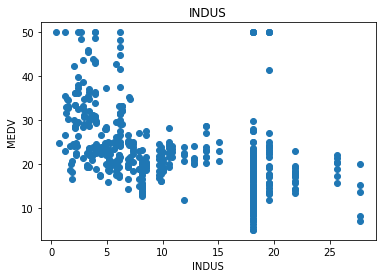

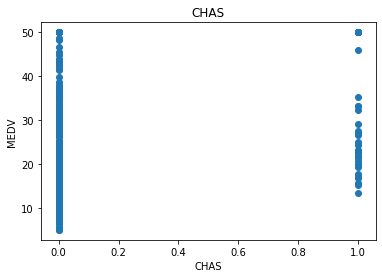

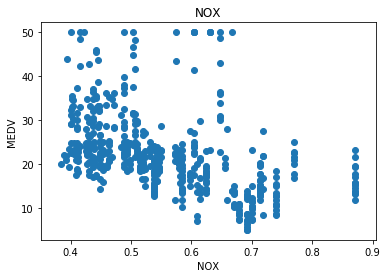

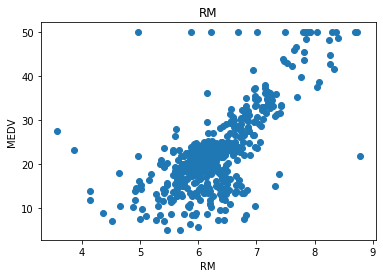

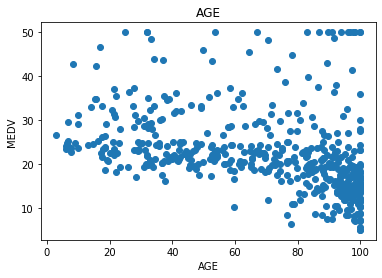

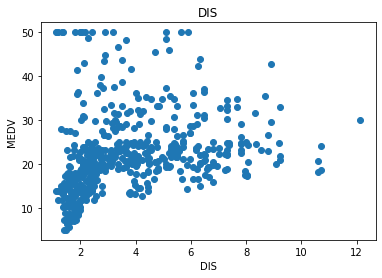

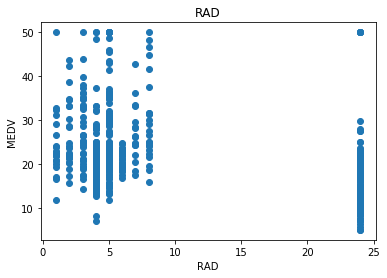

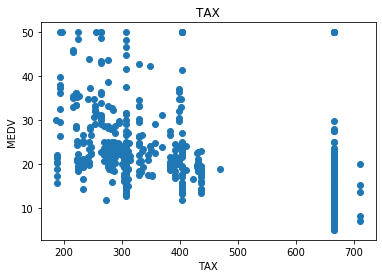

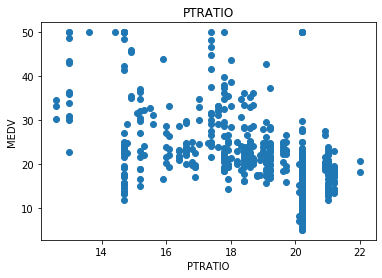

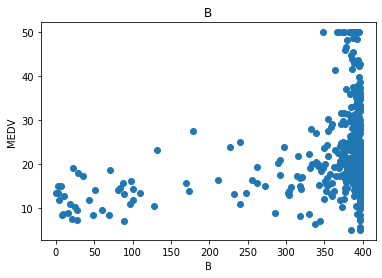

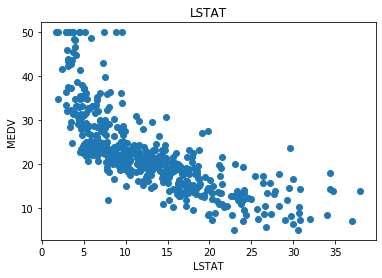

In [14]:
y_axis_data = housingdata['MEDV'].values
x_axis_names = list(housingdata)
x_axis_names = x_axis_names[:-1] #Cut off last element (MEDV)

for col_name in x_axis_names:
  plt.scatter(housingdata[col_name].values, x_axis_data)
  plt.ylabel('MEDV')
  plt.xlabel(col_name)
  plt.title(col_name)
  plt.show()

#### Most & Least Relevant Features?
Based on these plots, the most relevent features are likely to be those with some sort of trend, and the least relevant are likely to be those with no obvious trend. # of Rooms (RM) has perhaps the most obvious correlation with median value. % lower status of the population (LSTAT) has some obvious correlation based on these graphs. AGE also has some correlation, but not near as obvious. Nothing else really pops out, and more investigation must be done. B seems to be the least relevant from these simple graphs

### Part B: Find the best fitting linear model for every subset of AGE/INDUS/NOX/RM/TAX

In [86]:
from itertools import chain,combinations
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from collections import OrderedDict

test_names = ['AGE', 'INDUS', 'NOX', 'RM', 'TAX']
test_names_comb = [] #all combinations
for i in range(len(test_names)):
    test_names_comb.extend(list(combinations(test_names, i+1)));

training_df = housingdata.iloc[:400]
testing_df = housingdata.iloc[400:]

training_y_vals = training_df['MEDV'].values
testing_y_vals = testing_df['MEDV'].values

MSE_dict = {}
for name_comb in test_names_comb:
    training_X_vals = training_df[list(name_comb)].values
    testing_X_vals = testing_df[list(name_comb)].values
    lm = LinearRegression()
    lm.fit(training_X_vals, training_y_vals)

    y_prediction_vals = lm.predict(testing_X_vals)
    mse = mean_squared_error(testing_y_vals, y_prediction_vals)
    MSE_dict[str(list(name_comb))] = mse
   
sorted_MSE = dict(sorted(MSE_dict.items(), key=lambda x: x[1]))
     
lowest_MSE = list(sorted_MSE.keys())[0]
print("Subset with lowest MSE is " + lowest_MSE, ' : ', sorted_MSE[lowest_MSE])

# Print out all of them
for key in sorted_MSE:
    print(key, ' : ', sorted_MSE[key])

Subset with lowest MSE is ['AGE', 'NOX', 'TAX']  :  30.00195963093166
['AGE', 'NOX', 'TAX']  :  30.00195963093166
['AGE', 'TAX']  :  30.20671495916984
['NOX', 'TAX']  :  30.533038702529495
['AGE', 'INDUS', 'TAX']  :  30.947990448212856
['AGE', 'INDUS', 'NOX', 'TAX']  :  31.43144876996169
['INDUS', 'NOX', 'TAX']  :  31.573465371085444
['INDUS', 'TAX']  :  31.59806135226472
['TAX']  :  31.616309248530463
['INDUS', 'NOX']  :  42.151032572595966
['AGE', 'INDUS', 'NOX']  :  42.349060189792745
['AGE', 'INDUS']  :  42.58923467339693
['INDUS']  :  43.833689891794826
['AGE', 'NOX']  :  54.01451713989449
['NOX']  :  54.926077481784844
['INDUS', 'NOX', 'RM', 'TAX']  :  57.54306207066495
['INDUS', 'RM', 'TAX']  :  57.55773548528379
['AGE', 'RM', 'TAX']  :  57.585717306955026
['AGE', 'INDUS', 'RM', 'TAX']  :  57.58601258240724
['AGE', 'INDUS', 'NOX', 'RM', 'TAX']  :  57.66880172417851
['AGE', 'NOX', 'RM', 'TAX']  :  57.85749688745463
['NOX', 'RM', 'TAX']  :  57.96809672110885
['RM', 'TAX']  :  58.2

### Part C: 

#### For i = 0 there is no model since that means there are no attributes


#### For i = 1 :
The subset with the lowest MSE where i = 1 is 